In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [120]:
df = pd.read_csv('tested.csv')

In [121]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [123]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [124]:
n = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[n]

In [125]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
pip install numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN

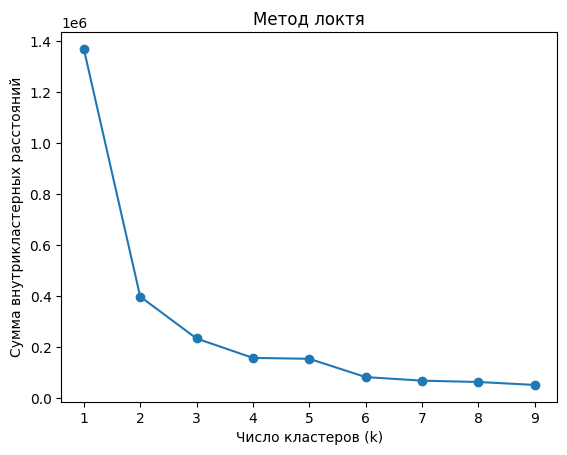

In [128]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Метод локтя")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Сумма внутрикластерных расстояний")
plt.show()

In [129]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=15)
df['KMeans_Group'] = kmeans.fit_predict(X_scaled)
print(df.groupby('KMeans_Group')[n].mean())
cluster_counts = df['KMeans_Group'].value_counts().sort_index()
print("Количество пассажиров в каждой группе:")
print(cluster_counts)

                   Sex        Age     SibSp     Parch        Fare
KMeans_Group                                                     
0             0.000000  28.801281  0.231405  0.115702   19.059831
1             0.650000  47.137500  0.750000  0.775000  171.925315
2             1.000000  26.332705  0.426230  0.483607   22.958710
3             0.285714  21.750000  3.500000  3.285714   41.466964
Количество пассажиров в каждой группе:
KMeans_Group
0    242
1     40
2    122
3     14
Name: count, dtype: int64


In [130]:
counts = df['KMeans_Group'].value_counts().sort_index()
print(f"Всего групп: {len(counts)}")
print("Распределение пассажиров по группам:", counts.to_dict())

Всего групп: 4
Распределение пассажиров по группам: {0: 242, 1: 40, 2: 122, 3: 14}


Text(0, 0.5, 'Количество человек')

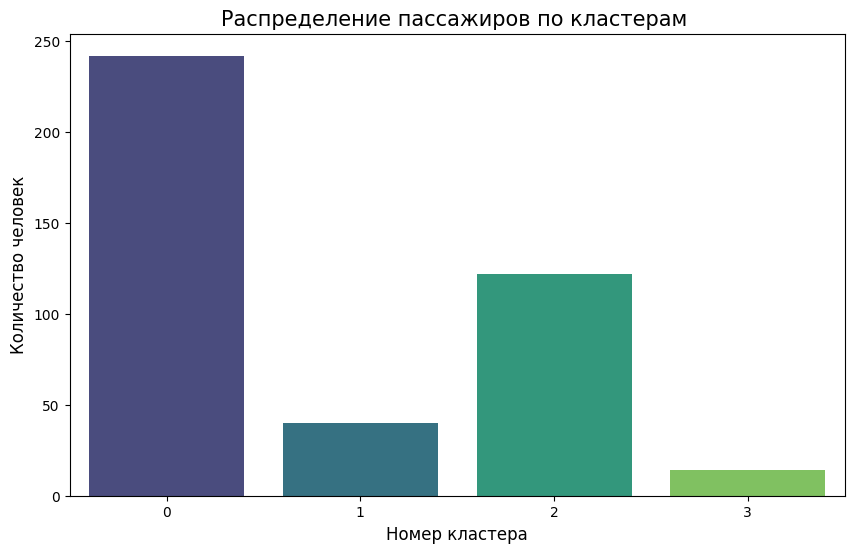

In [131]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='KMeans_Group', data=df, palette='viridis')
plt.title('Распределение пассажиров по кластерам ', fontsize=15)
plt.xlabel('Номер кластера', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

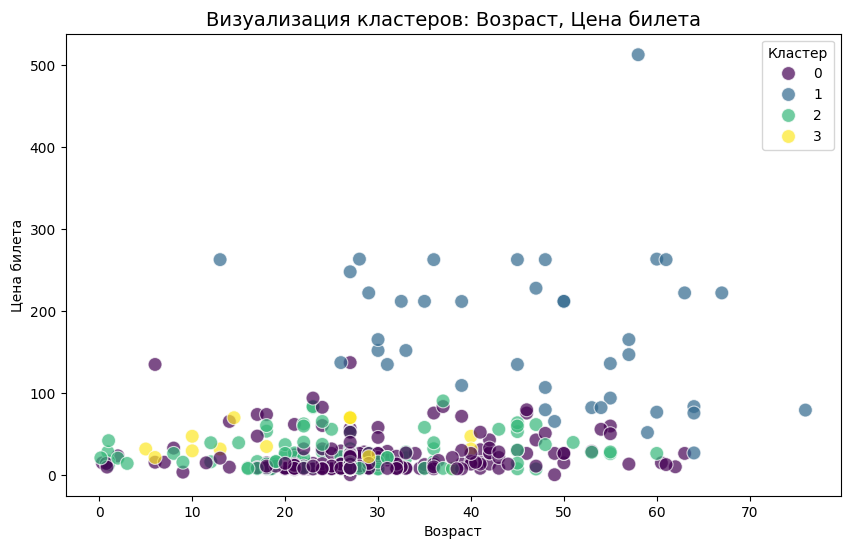

In [132]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='KMeans_Group', palette='viridis', s=100, alpha=0.7)
plt.title('Визуализация кластеров: Возраст, Цена билета', fontsize=14)
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.legend(title='Кластер')
plt.show()

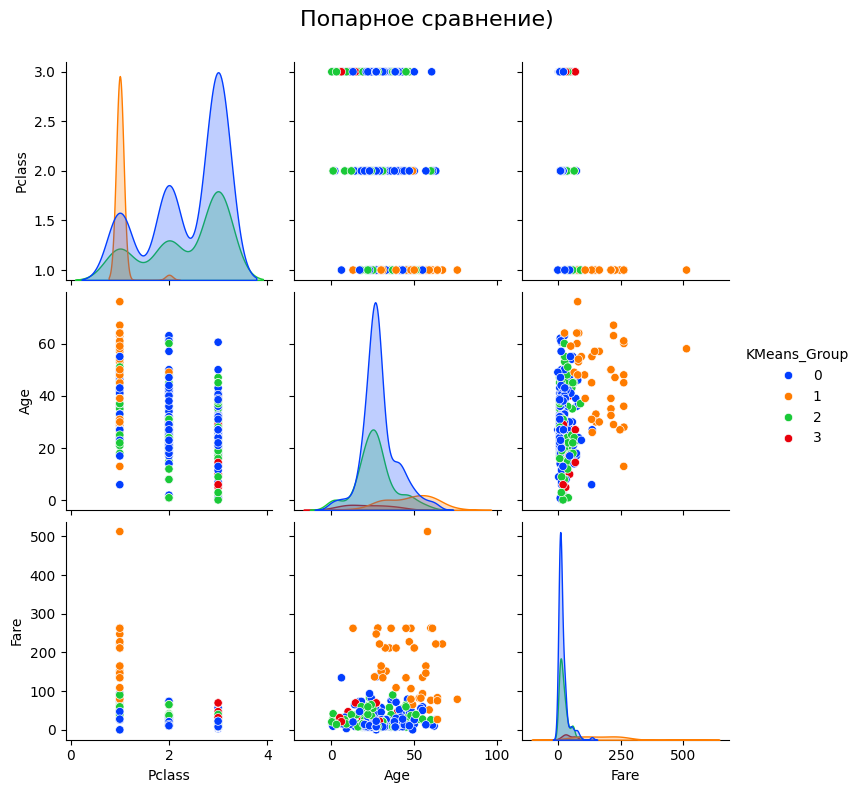

In [133]:
plot_df = df[['Pclass', 'Age', 'Fare', 'KMeans_Group']]
pair_grid = sns.pairplot(plot_df, hue='KMeans_Group', palette='bright', diag_kind='kde')
pair_grid.fig.suptitle('Попарное сравнение)', y=1.05, fontsize=16)
plt.show()

In [134]:
dbscan = DBSCAN(eps= 2, min_samples=5)
df['DBSCAN'] = dbscan.fit_predict(X_scaled)
n_clusters_kmeans = len(df['KMeans_Group'].unique())
labels_dbscan = dbscan.labels_
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_dbscan = list(labels_dbscan).count(-1)
n_ = list(df['DBSCAN']).count(-1)
print(f"Количество кластеров: {n_clusters_dbscan}")
print(f"Выбросы по пассажирам: {n_}")

Количество кластеров: 2
Выбросы по пассажирам: 14
